## <center><u><font color="#110896">  Crime Data Analysis for Nottinghamshire from April to September in 2020 and 2021</font></u></center>

## <font color="#110896"> Description
    
This project involves collecting, cleaning, wrangling, and performing exploratory data analysis on crime data in Nottinghamshire.  The dataset contains data on crime for the months of April through September in 2020 and 2021. The goal is to gain insights into the crime trends during these periods.

### <font color="#110896"> Import the libraries we'll be using in this project.

In [1]:
# import basic libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

### <font color="#110896"> **Import all the dataset and combine into one**

In [2]:
# file names
file_names = ['2020-04-nottinghamshire-street.csv', '2020-05-nottinghamshire-street.csv', 
              '2020-06-nottinghamshire-street.csv', '2020-07-nottinghamshire-street.csv', 
              '2020-08-nottinghamshire-street.csv', '2020-09-nottinghamshire-street.csv', 
              '2021-04-nottinghamshire-street.csv', '2021-05-nottinghamshire-street.csv',
              '2021-06-nottinghamshire-street.csv', '2021-07-nottinghamshire-street.csv',
              '2021-08-nottinghamshire-street.csv', '2021-09-nottinghamshire-street.csv']

# Header to be used for all files
header = ["Crime ID", "Month","Reported by","Falls within",
          "Longitude","Latitude","Location","LSOA code",
          "LSOA name","Crime type","Last outcome category","Context"] 

# Create an empty DataFrame
combined_df = pd.DataFrame(columns=header)

# Loop over each file
for file_name in file_names:
    # Read the CSV file
    df = pd.read_csv(file_name, skiprows=1, header=None, names=header)
    
    # Append the current file's data to the combined DataFrame
    combined_df = combined_df.append(df, ignore_index=True)

In [3]:
# check the top 2 rows of the dataset
combined_df.head(2)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2020-04,Nottinghamshire Police,Nottinghamshire Police,-1.347377,53.063292,On or near Victoria Street,E01019444,Amber Valley 003B,Anti-social behaviour,NaN,NaN
1,bfd6c44f73643dfd5eeab912d57bdaf27e19b85a714cde...,2020-04,Nottinghamshire Police,Nottinghamshire Police,-1.411511,53.052552,On or near Pasteur Avenue,E01019454,Amber Valley 006B,Violence and sexual offences,Unable to prosecute suspect,NaN


In [4]:
# check the information about the dataset
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142676 entries, 0 to 142675
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Crime ID               93860 non-null   object 
 1   Month                  142676 non-null  object 
 2   Reported by            142676 non-null  object 
 3   Falls within           142676 non-null  object 
 4   Longitude              141787 non-null  float64
 5   Latitude               141787 non-null  float64
 6   Location               142676 non-null  object 
 7   LSOA code              141787 non-null  object 
 8   LSOA name              141787 non-null  object 
 9   Crime type             142676 non-null  object 
 10  Last outcome category  93860 non-null   object 
 11  Context                0 non-null       float64
dtypes: float64(3), object(9)
memory usage: 13.1+ MB


In [5]:
# check the missing value in the dataset
combined_df.isnull().sum()

Crime ID                  48816
Month                         0
Reported by                   0
Falls within                  0
Longitude                   889
Latitude                    889
Location                      0
LSOA code                   889
LSOA name                   889
Crime type                    0
Last outcome category     48816
Context                  142676
dtype: int64

**Fill missing values in numeric columns with mean**

In [6]:
# Fill missing values in numeric columns with mean
numeric_cols = ['Longitude', 'Latitude']
combined_df[numeric_cols] = combined_df[numeric_cols].fillna(combined_df[numeric_cols].mean())

**Fill missing values in categorical columns with the mode**

In [7]:
# Fill missing values in categorical columns with the mode
categorical_cols = ['LSOA code', 'LSOA name', 'Last outcome category']
combined_df[categorical_cols] = combined_df[categorical_cols].fillna(combined_df[categorical_cols].mode().iloc[0])

**Drop the 'Context' column as it has all missing values**

In [8]:
# Drop the 'Context' column as it has all missing values
combined_df = combined_df.drop('Context', axis=1)

**Drop the 'Crime ID' column as it has all unique id**

In [9]:
# Drop the 'Crime ID' column as it has all unique id
combined_df = combined_df.drop('Crime ID', axis=1)

In [10]:
# Check for missing values again
combined_df.isnull().sum()

Month                    0
Reported by              0
Falls within             0
Longitude                0
Latitude                 0
Location                 0
LSOA code                0
LSOA name                0
Crime type               0
Last outcome category    0
dtype: int64

In [11]:
# check the description about dataset
combined_df.describe(include = "object")

,Month,Reported by,Falls within,Location,LSOA code,LSOA name,Crime type,Last outcome category
count,142676,142676,142676,142676,142676,142676,142676,142676
unique,12,1,1,9471,1155,1155,14,14
top,2020-05,Nottinghamshire Police,Nottinghamshire Police,On or near Supermarket,E01033406,Nottingham 039E,Anti-social behaviour,Unable to prosecute suspect
freq,12702,142676,142676,4783,2907,2907,48816,85755


**Conclusion**


1. **Unique Locations:** There are 9,471 unique locations where the crimes were reported.
2. **LSOA Name:** There are 1,155 unique LSOA names mentioned in the data.
3. **Crime Types:** There are 14 unique crime types included in the data.
4. **Reported Crimes:** The total number of reported crimes is 142,676.
5. **Unable to Prosecute:** The most frequently occurring last outcome category is "Unable to prosecute suspect" with 85,755 instances.
6. **Anti-social Behaviour:** The most frequently occurring crime type is "Anti-social behaviour" with 48,816 instances.

## <font color="#110896"> Exploratory Data Analysis

In [12]:
# Convert the 'Month' column to datetime
combined_df['Month'] = pd.to_datetime(combined_df['Month'])

# extract the year and month and store in separate column
combined_df['Year_only'] = combined_df['Month'].dt.year
combined_df['Month_only'] = combined_df['Month'].dt.month

# and see the top 2 rows of the dataset
combined_df.head(2)

,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Year_only,Month_only
0,2020-04-01,Nottinghamshire Police,Nottinghamshire Police,-1.347377,53.063292,On or near Victoria Street,E01019444,Amber Valley 003B,Anti-social behaviour,Unable to prosecute suspect,2020,4
1,2020-04-01,Nottinghamshire Police,Nottinghamshire Police,-1.411511,53.052552,On or near Pasteur Avenue,E01019454,Amber Valley 006B,Violence and sexual offences,Unable to prosecute suspect,2020,4


**Graph 1: Line Graph - Monthly Crime Count**

The monthly crime total for Nottinghamshire from April to September in 2020 and 2021 is shown in this line graph. It enables us to assess any apparent trends or changes in the crime trends between the two years.

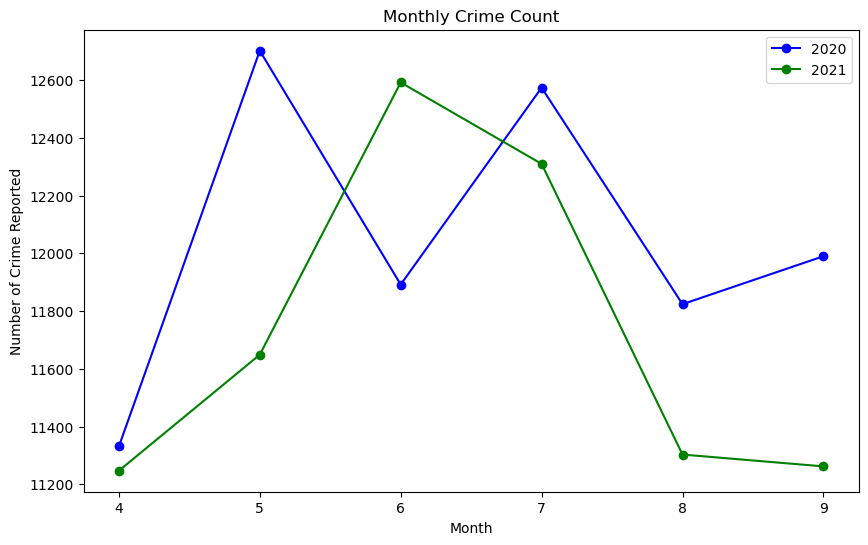

In [13]:
# Group by year and month and count the number of crimes
monthly_counts = combined_df.groupby(['Year_only', 'Month_only']).size().unstack()

# Create a line graph
plt.figure(figsize=(10, 6))
monthly_counts.iloc[0].plot(kind='line', marker='o', label='2020', color='blue')
monthly_counts.iloc[1].plot(kind='line', marker='o', label='2021', color='green')
plt.title('Monthly Crime Count')
plt.xlabel('Month')
plt.ylabel('Number of Crime Reported')
plt.legend()
plt.show()

**Explanation**

The line graph shows Nottinghamshire's monthly crime totals for 2020 and 2021. The vertical axis of the graph's points reflects the number of crimes reported in each individual month, and each point refers to a particular month.

A comparison of the two years is shown on the chart. The crime rate in 2020 began at 11,331 in April, rose to 12,892 in May and June, then began to decline from July through September. In contrast, the crime rate in 2021 was comparatively stable, rising from 11,247 in April to 12,592 in June before marginally falling in July, August, and September.


**Graph 2: Pie Chart - Last Outcome Categories**

The top 5 most current outcome categories for reported crimes in Nottinghamshire are categorised according to the pie chart. It presents a percentage breakdown for various outcome categories and provides details about reported crimes' outcomes.

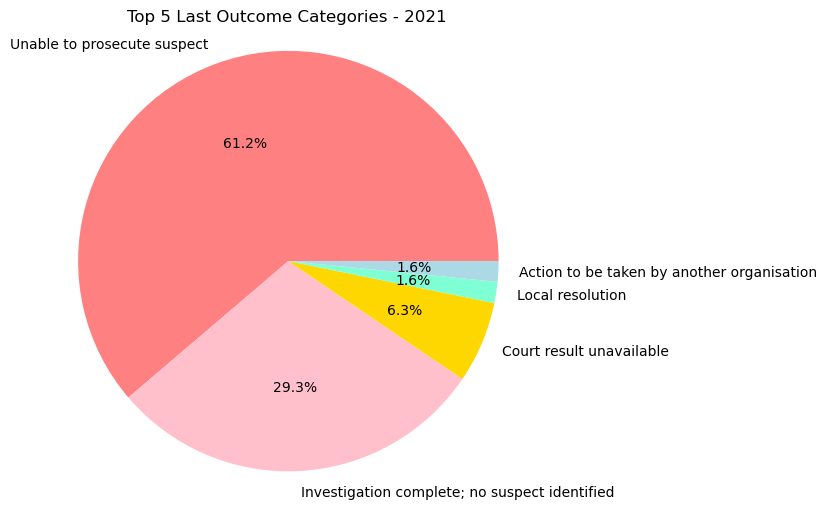

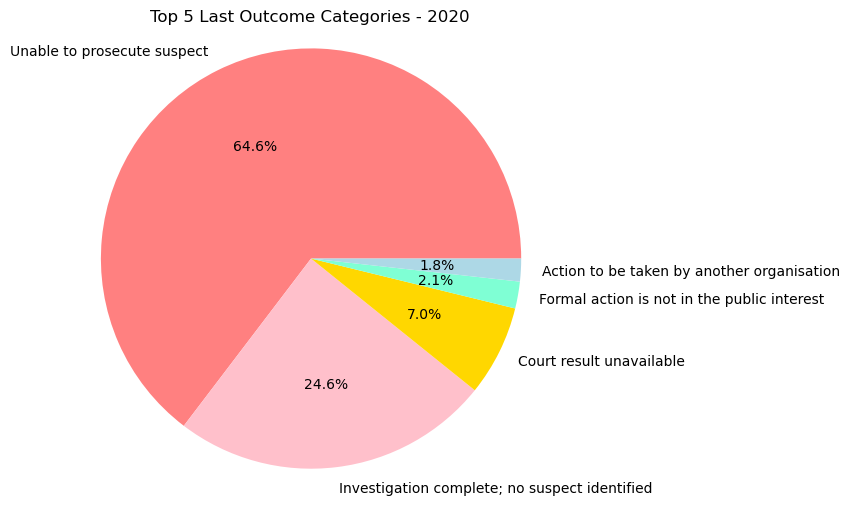

In [14]:
# Filter data for 2021 and 2020
df_2021 = combined_df[combined_df['Year_only'] == 2021]
df_2020 = combined_df[combined_df['Year_only'] == 2020]

# Count the occurrences of each last outcome category for 2021
outcome_counts_2021 = df_2021['Last outcome category'].value_counts().nlargest(5)

# Count the occurrences of each last outcome category for 2020
outcome_counts_2020 = df_2020['Last outcome category'].value_counts().nlargest(5)

# Define beautiful colors for the pie charts
colors = ['#FF8080', '#FFC0CB', '#FFD700', '#7FFFD4', '#ADD8E6']

# Create a pie chart for 2021
plt.figure(figsize=(6, 6))
plt.pie(outcome_counts_2021, labels=outcome_counts_2021.index, autopct='%1.1f%%', colors=colors)
plt.title('Top 5 Last Outcome Categories - 2021')
plt.axis('equal')
plt.show()

# Create a pie chart for 2020
plt.figure(figsize=(6, 6))
plt.pie(outcome_counts_2020, labels=outcome_counts_2020.index, autopct='%1.1f%%', colors=colors)
plt.title('Top 5 Last Outcome Categories - 2020')
plt.axis('equal')
plt.show()

**EXPLANATION**

The majority of cases had the outcomes "Unable to prosecute suspect" (61.2%) and "Investigation complete; no suspect identified" (29.3%), according to the pie chart for the Last Outcome Category in 2021. These outcomes were followed by others such as "Court result unavailable" (6.3%), "Local resolution" (1.6%), and "Action to be taken by another organisation" (1.6%).

Similar patterns can be seen in the pie chart for the Last Outcome Category in 2020, which shows the highest percentages of cases in the categories of "Unable to prosecute suspect" (64.6%) and "Investigation complete; no suspect identified" (24.6%), as well as "Court result unavailable" (7.0%), "Formal action is not in the public interest" (2.1%), and "Action to be taken by another organisation" (1.8%).


**Graph 3: Bar Graph - Crime Types**

The distribution of various crime types in Nottinghamshire from April to September in 2020 and 2021 is shown in this bar graph. In order to compare 2020 and 2021, it gives an overview of the most common crime categories and related counts.


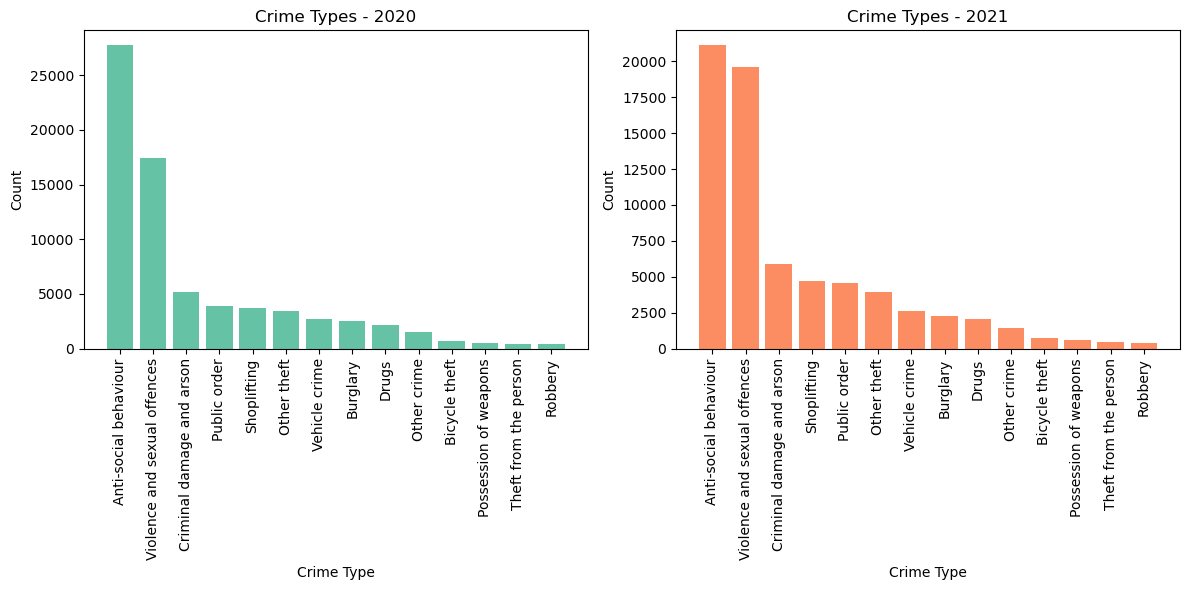

In [19]:
# Count the occurrences of each crime type for 2020
crime_counts_2020 = df_2020['Crime type'].value_counts()

# Count the occurrences of each crime type for 2021
crime_counts_2021 = df_2021['Crime type'].value_counts()

# color palette for the bar graphs
colors = sns.color_palette('Set2')

# Create two bar graphs side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar graph for 2020
axes[0].bar(crime_counts_2020.index, crime_counts_2020.values, color=colors[0])
axes[0].set_title('Crime Types - 2020')
axes[0].set_xlabel('Crime Type')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

# Bar graph for 2021
axes[1].bar(crime_counts_2021.index, crime_counts_2021.values, color=colors[1])
axes[1].set_title('Crime Types - 2021')
axes[1].set_xlabel('Crime Type')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


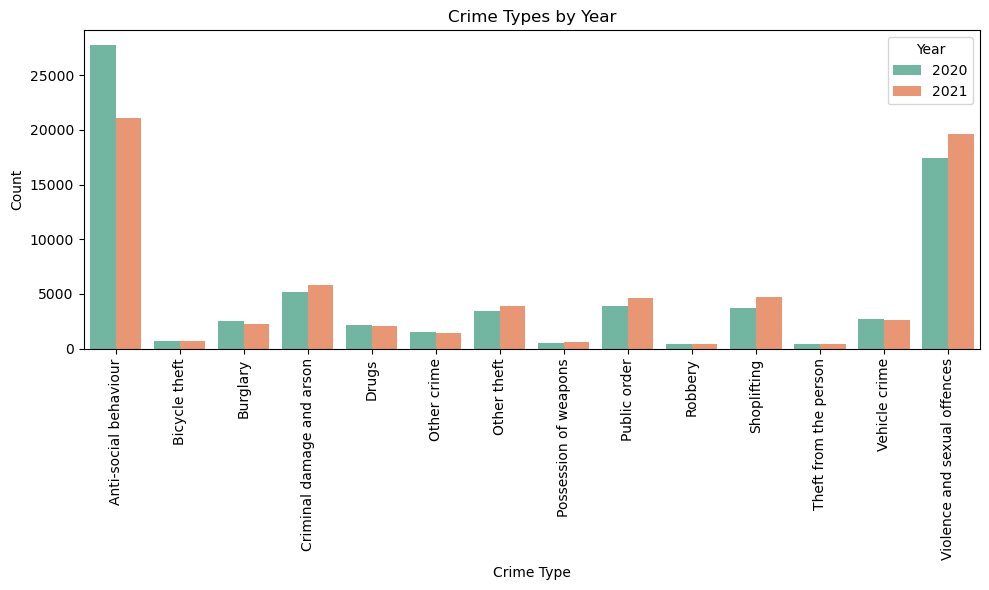

In [16]:
# Group by crime type and year, and count the occurrences
crime_counts = combined_df.groupby(['Crime type', 'Year_only']).size().unstack().reset_index()

# melt the data
crime_counts = crime_counts.melt('Crime type', var_name='Year_only', value_name='Count')

# color palette for the bar graph
colors = sns.color_palette('Set2')

# the bar graph with hue
plt.figure(figsize=(10, 6))
sns.barplot(data=crime_counts, x='Crime type', y='Count', hue='Year_only', palette=colors)
plt.title('Crime Types by Year')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Year')
plt.tight_layout()
plt.show()


**EXPLANATION**

The count of all the crime types for the years 2020 and 2021 is shown in the bar chart. The height of each bar in the graph denotes the frequency of that particular crime category, and each bar represents a different form of crime.

Antisocial behaviour, bicycle theft, burglary, criminal damage and arson, drugs, other crime, other theft, possession of weapons, public order, robbery, shoplifting, theft from the person, vehicle crime, and violence and sexual offences are only some of the crime types covered in the chart.

According to the year they belong to, the bars are grouped. The orange bars show the crime counts for the year 2021, and the green bars show the crime counts for the year 2020.


The figure shows the relative frequency of each crime type over the course of the two years. For instance, we can see that the most frequently reported crime types in both years are anti-social conduct, and violence and sexual offences. Contrarily, when compared to other crime types, theft from people, possession of weapons, theft from bicycles, and robbery all had significantly lower numbers.